In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('clients.csv')

In [3]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [4]:
df.describe()

,ID,Building,Year of sale,Month of sale,Property number,Area (ft.),Age at time of purchase,Y,M,D,Deal satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,46.151685,1960.325843,6.752809,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,12.841692,12.835575,3.450312,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,55.000000,1969.750000,9.750000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,76.000000,1986.000000,15.000000,31.000000,5.000000


In [5]:
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [13]:
gender = df['Gender'].fillna('Firm').value_counts()
age_intervals = df['Age Interval '].fillna('Firm').value_counts()
ages = df['Age at time of purchase']
types_of_property = df['Type of property'].value_counts()
areas_m2 = df['Area (ft.)']/10.764
price = df['Price'].apply(lambda x: float(x.replace('$ ', '').replace(',', '')))
purpose = df['Purpose'].value_counts()
source = df['Source'].value_counts()
motrgage = df['Mortgage'].value_counts()

<AxesSubplot:title={'center':'Mortgage'}>

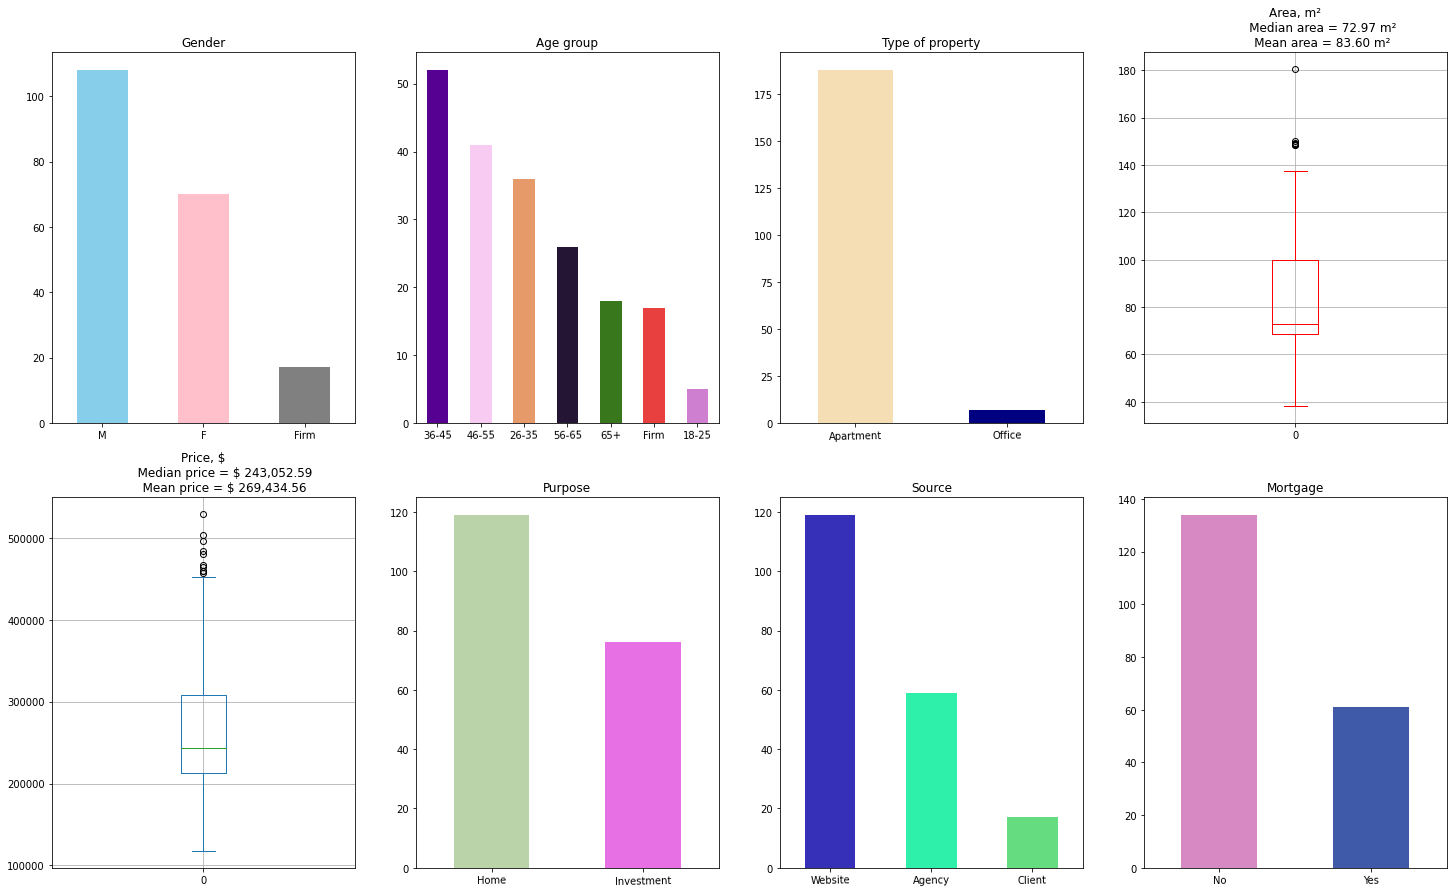

In [14]:
fig, axes = plt.subplots(figsize=(25,15), nrows=2, ncols=4)

gender.plot(ax=axes[0,0], kind='bar', title='Gender', rot=1, color=['skyblue', 'pink', 'gray'])
age_intervals.plot(ax=axes[0,1], kind='bar', title='Age group', rot=1, color=np.random.rand(len(age_intervals), 3))
types_of_property.plot(ax=axes[0,2], kind='bar', title='Type of property', rot=1, color=['wheat', 'navy'])

areas_m2.plot(ax=axes[0,3],
              kind='box', 
              title=
              '''Area, m\u00B2
              Median area = {:.2f} m\u00B2
              Mean area = {:.2f} m\u00B2'''.format(areas_m2.median(), areas_m2.mean()),
              rot=1,
              color='red', 
              use_index=False, 
              grid=True)

price.plot(ax=axes[1,0],
           kind='box',
           title=
           '''Price, $
           Median price = $ {:,.2f}
           Mean price = $ {:,.2f}'''.format(price.median(), price.mean()),
           rot=1,
           use_index=False,
           grid=True)

purpose.plot(ax=axes[1,1], kind='bar', title='Purpose', rot=1, color=np.random.rand(len(purpose), 3))
source.plot(ax=axes[1,2], kind='bar', title='Source', rot=1, color=np.random.rand(len(source), 3))
motrgage.plot(ax=axes[1,3], kind='bar', title='Mortgage', rot=1, color=np.random.rand(len(motrgage), 3))


### Портрет целевого клиента: мужчина 36-45 лет, хочет купить апартаменты с целью проживания площадью ~73 кв.м, бюджет ~243,000 $ без привлечения ипотеки. Источник лида - сайт.